<a href="https://colab.research.google.com/github/mukhinvictor777/AB/blob/main/AB_Final_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(('/content/drive/MyDrive/a_b_test_ecom.xlsx'))

In [4]:
data.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         294478 non-null  int64 
 1   time       294478 non-null  object
 2   con_treat  294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
data.shape

(294478, 5)

In [7]:
data.describe()

,id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [8]:
data.isna().sum()

id           0
time         0
con_treat    0
page         0
converted    0
dtype: int64

In [9]:
data.page.value_counts()

old_page    147239
new_page    147239
Name: page, dtype: int64

In [10]:
df = data[(data["con_treat"] == "treatment") & (data["page"] == "new_page")
        |(data["con_treat"] == "control") & (data["page"] == "old_page")]

In [11]:
df.shape

(290585, 5)

In [12]:
df = df.drop_duplicates(subset=['id'], keep = 'first', inplace = False)

In [13]:
df.shape

(290584, 5)

In [14]:
df.page.value_counts()

new_page    145310
old_page    145274
Name: page, dtype: int64

In [15]:
control = df[data['page'] == 'old_page']
control.head()

<ipython-input-15-bc492e01c06b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control = df[data['page'] == 'old_page']


,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
7,719014,48:29.5,control,old_page,0


In [16]:
control.shape

(145274, 5)

In [17]:
test = df[df['page'] == 'new_page']

In [18]:
test.shape

(145310, 5)

In [19]:
df.converted.mean() * 100

11.959708724499627

In [20]:
c_mean = control.converted.mean() * 100

In [21]:
t_mean = test.converted.mean() * 100

In [22]:
diff = (t_mean - c_mean)/c_mean
diff*100

-1.31097884589481

*   Среднее значение по конверсии составляет 11.96%
*   Среднее значение по конверсии из контрольной группы составляет 12.04%
*   Среднее значение по конверсии из тестовой группы составляет 11.88%
*   Мы можем заметить снижение конверсии после у пользователей, которые видели новую страницу на 1.31%
*   Данные между контрольной и тестовой группой разделены поровну





In [23]:
df.shape[0]

290584

Теперь создадим выборочное распределения разницы средних значений

In [24]:
means_diff = []
for i in range(10000):
    sample = df.sample(n = 1000, replace = True)
    control_mean = sample[sample["con_treat"] == "control"]["converted"].mean()
    treat_mean = sample[sample["con_treat"] == "treatment"]["converted"].mean()
    means_diff.append(treat_mean - control_mean)

In [25]:
means_diff = np.array(means_diff)

In [26]:
means_diff.size

10000

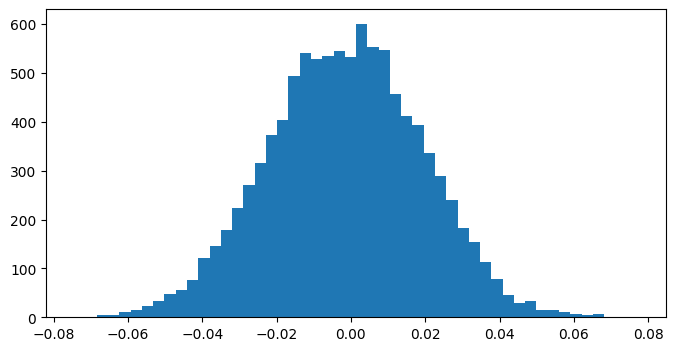

In [27]:
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(means_diff, bins = 50)
plt.show()

In [28]:
null_vals = np.random.normal(0, means_diff.std(), means_diff.size)

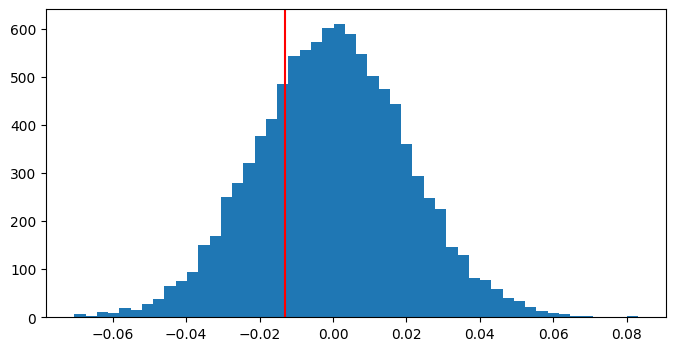

In [29]:
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_vals, bins = 50)
plt.axvline(diff, c='red')
plt.show()

Вычислим P - Value

In [30]:
(null_vals > diff).mean()

0.7352

P - Value > Alpha (0.05) => статистически значимых изменений нет, поэтому стоит оставить начальную версию страницы

Попробуем исследовать данные другим способом

In [31]:
from statsmodels.stats.proportion import proportions_ztest

In [32]:
convert_old = df[(df["converted"] == 1) & (df["page"] == "old_page")]['id'].nunique()
convert_new = df[(df["converted"] == 1) & (df["page"] == "new_page")]['id'].nunique()
n_old = df[df["page"] == "old_page"]['id'].nunique()
n_new = df[df["page"] == "new_page"]['id'].nunique()

In [33]:
z_score, p_value = proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [36]:
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

P - Value > Alpha (0.05) => статистически значимых различий нет, поэтому стоит оставить начальную версию страницы

# Mobile Games AB Testing with Cookie Cats

In [37]:
cats = pd.read_excel(('/content/drive/MyDrive/AB_Final_task.xlsx'))

In [38]:
cats.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [39]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [40]:
cats.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [41]:
data.isna().sum()

id           0
time         0
con_treat    0
page         0
converted    0
dtype: int64

In [42]:
cats.shape

(90189, 5)

In [43]:
cats.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [44]:
cats.nlargest(5, ['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,0,1
7912,871500,gate_30,2961,1,1
29417,3271615,gate_40,2640,1,0
43671,4832608,gate_30,2438,1,1
48188,5346171,gate_40,2294,1,1


In [45]:
cats = cats[cats.sum_gamerounds < 3000]

In [46]:
cats.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018800e+04,90188.000000,90188.000000,90188.000000
mean,4.998397e+06,51.320253,0.445214,0.186056
std,2.883298e+06,102.682719,0.496992,0.389154
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512211e+06,5.000000,0.000000,0.000000
50%,4.995804e+06,16.000000,0.000000,0.000000
75%,7.496461e+06,51.000000,1.000000,0.000000
max,9.999861e+06,2961.000000,1.000000,1.000000


In [50]:
A = cats.version.groupby(cats.version == 'gate_30').count()
B = cats.version.groupby(cats.version == 'gate_40').count()
print(A)
print(B)

version
False    45489
True     44699
Name: version, dtype: int64
version
False    44699
True     45489
Name: version, dtype: int64


Число версий для контрольной (gate_30) и тестовой (gate_40) приблизительно равно. Теперь проверим данные на нормальность. Так как число версий > 5000 будем использовать тест Колмагорова-Смирнова

In [63]:
cats_control = np.array(cats.sum_gamerounds[cats['version'] == 'gate_30'])
cats_test = np.array(cats.sum_gamerounds[cats['version'] == 'gate_40'])

In [65]:
len(cats_control), len(cats_test)

(44699, 45489)

In [66]:
stats.ks_2samp(cats_control, cats_test, alternative='two-sided', method='auto')

KstestResult(statistic=0.010258010418840668, pvalue=0.01727609923280408, statistic_location=22, statistic_sign=-1)

pvalue = 0.017 < Alpha = 0.05 Значит мы отвергаем гипотизу о нормальности распределения.
Посколько распределение не нормальное, то мы будем использовать для сравнения двух групп количественных данных с ненормальным распределением мы будем использовать критерий Манна-Уитни.

In [67]:
stats.mannwhitneyu(cats_control, cats_test)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

P-value очень близко к Aplpha = 0.05. Если понизить вероятность ошибки первого рода, то можно сказать, что статистически значимых изменений нет и перемещать ворота с 30 уровня на 40 не стоит. Но лучше провести дополнительные исследования.

In [72]:
100*cats.sum_gamerounds[cats['sum_gamerounds'] < 30].count()/cats.sum_gamerounds.count()

63.112609216303724

Text(0.5, 1.0, 'Number of game rounds players on the first week')

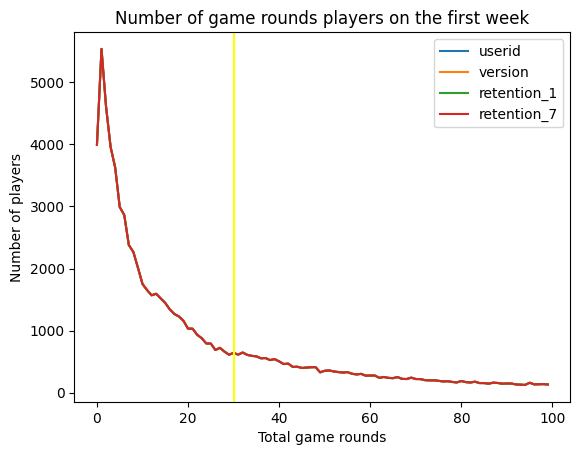

In [70]:
plot_df = cats.groupby('sum_gamerounds').count()

ax = plot_df[:100].plot()
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
plt.axvline(30, c='yellow')
ax.set_title('Number of game rounds players on the first week')

График показывает, что большенство пользователей (63%) играет менее 30 раундов.

Построим гистограммный график различных распределений групп AB.
Чтобы получить более детальное представление о низкой и высокой активности пользователей изменим наше распределение выборок.

In [74]:
plt.style.use('ggplot')

Group_A = cats[cats.version == 'gate_30']
print(Group_A.head())

Group_B = cats[cats.version == 'gate_40']
print(Group_B.head())

bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500]
plot_GA = pd.DataFrame(Group_A.groupby(pd.cut(Group_A['sum_gamerounds'],
                                              bins=bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B['sum_gamerounds'],
                                              bins=bins)).count())

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3            0            0
1      337  gate_30              38            1            0
6     1066  gate_30               0            0            0
11    2101  gate_30               0            0            0
13    2179  gate_30              39            1            0
   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165            1            0
3     483  gate_40               1            0            0
4     488  gate_40             179            1            1
5     540  gate_40             187            1            1
7    1444  gate_40               2            0            0


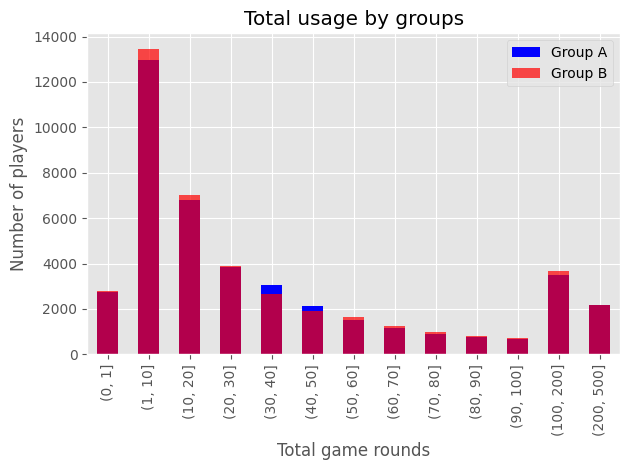

In [75]:
ax = plot_GA.plot(kind = 'bar', y='userid', color = 'blue', alpha = 1,
                  title = 'Total usage by groups')
plot_GB.plot(kind = 'bar', y = 'userid', ax = ax, color = 'red', alpha = 0.7)
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
plt.legend(['Group A', 'Group B'])
plt.tight_layout()
plt.grid(True)

График показывает, что обе версии имеют схожие результаты.
Есть различия в пределах 30-40 сыгранных раундов, но они тоже не столь существенны

Посмотрим на удежание пользователей в течение 1 дня

In [76]:
100*cats.retention_1.sum()/cats.retention_1.count()

44.521444094558035

In [78]:
oneday = cats.retention_1.groupby(cats.version).sum()/cats.retention_1.groupby(cats.version).count()
print(oneday*100)

version
gate_30    44.819795
gate_40    44.228275
Name: retention_1, dtype: float64


Обе версии имеют практически одинаковое удержание пользователей в течение 1 дня, однако в контрольной группе все же немного выше. Пока резултаты показывют, что изменения вносить нет смысла.
Воспользуемся Bootstrapp для более детального иследования

In [85]:
boot_1d = []
for i in range(1000):
  boot_mean = cats.retention_1.sample(frac=1, replace=True).groupby(cats.version).mean()
  boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
print(boot_1d)

version       gate_30   gate_40
retention_1  0.446173  0.437250
retention_1  0.453371  0.442971
retention_1  0.447237  0.439985
retention_1  0.450990  0.439466
retention_1  0.447521  0.444216
...               ...       ...
retention_1  0.448868  0.443464
retention_1  0.446625  0.447833
retention_1  0.454393  0.440777
retention_1  0.450081  0.445622
retention_1  0.444081  0.438398

[1000 rows x 2 columns]


Text(0.5, 0, 'The average of 1-day retention')

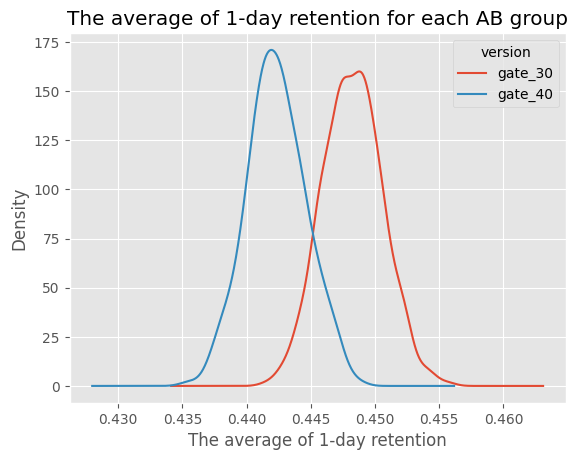

In [86]:
ax = boot_1d.plot.kde()
ax.set_title('The average of 1-day retention for each AB group')
ax.set_xlabel('The average of 1-day retention')

Text(0.5, 1.0, 'Zooming % difference')

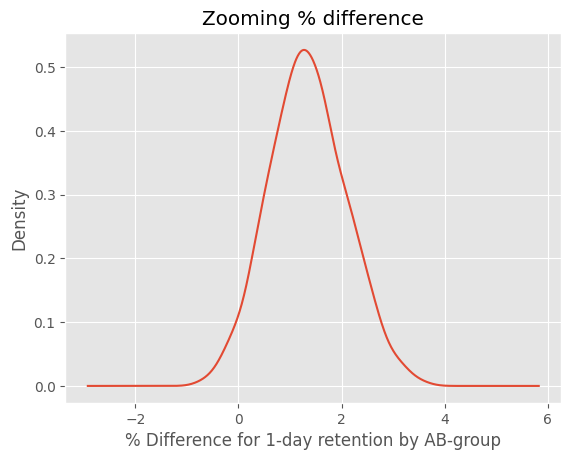

In [87]:
boot_1d['difference'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']*100

ax = boot_1d['difference'].plot.kde()
ax.set_xlabel('% Difference for 1-day retention by AB-group')
ax.set_title('Zooming % difference')

Из графика видно, что наиболее вероятная разница 1-2% в пользу ворот на 30 уровне.
Посчитаем в скольки процентах случаев разница больше 0.

In [88]:
prob = (boot_1d['difference'] > 0).sum() / len(boot_1d['difference'])
print(str(prob*100)+'%')

96.6%


Вероятность того, что удержание в течении 1 дня лучше, когда ворота находятся на уровне 30 равна 96.6%

Дальше расчитаем удержание в течении 7 дней для двух AB групп.

In [89]:
cats.groupby('version')['retention_7'].sum() / cats.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

Здесь удержание пользователей у группы контрольной группы также немного выше, чем у тестовой

In [91]:
boot_7d = []
for i in range(1000):
  boot_mean = cats.retention_7.sample(frac=1, replace=True).groupby(cats.version).mean()
  boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())

boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

version       gate_30   gate_40
retention_7  0.190934  0.180793
retention_7  0.189552  0.181868
retention_7  0.185863  0.183242
retention_7  0.188806  0.178484
retention_7  0.188526  0.183142


1.0


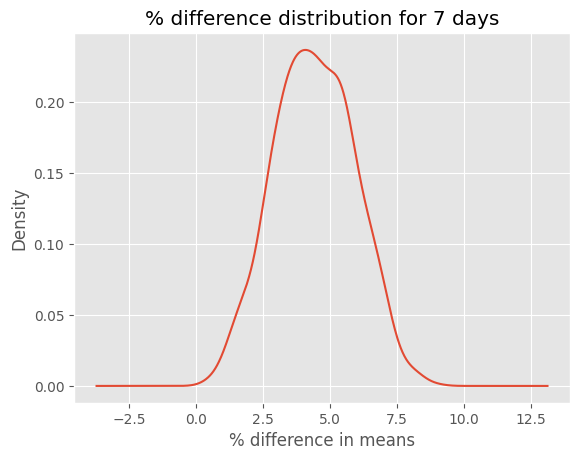

In [92]:
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel('% difference in means')
ax.set_title('% difference distribution for 7 days')

prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

print(prob)

In [93]:
prob7 = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(str(prob7*100)+'%')


100.0%


Наши исследования показали, что удержание пользователей в течение 7 дней в среднем выше, когда ворота находятся на уровне 30.
Для удержания аудитории не рекомендуется вносить изменения и нужно лучше остаться на начальной версии. В целом анализ по критерию Манна Уитни показал такой же результат, если для нас важна статистечская значимость выше 95%